#  Mental Health & Social Media Balance Analysis

## 📖Introduction

Modern digital lifestyles have dramatically increased daily screen time, especially on social media platforms. While social media can offer connection and entertainment, excessive use is increasingly linked to poor sleep quality, high stress, and reduced emotional well-being.


## 💼Business Problem

Mental-wellness apps, digital health companies, and public health organizations report that rising screen time is contributing to higher stress and declining happiness among users.

They struggle to identify:

- What behaviors increase stress
- Which lifestyle factors improve happiness
- Which user segments are at risk
- Whether digital detox features actually work


**This project uses data analysis and visualization to identify the strongest drivers of stress, predictors of happiness, and opportunities for intervention.**

## ❓Business Questions

1. Which digital and lifestyle habits most strongly drive stress levels?
2. Which factors have the biggest positive or negative effect on happiness?
3. Which user groups are at highest risk — and where can wellness apps intervene effectively?
4. Does reducing screen time or taking breaks from social media improve mental well-being ?
5. Which habits should a mental-health app focus on to improve user well-being?

## Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
df=pd.read_csv("data/mentalhealth_socialmedia_dataset.csv")

In [3]:
# View first 10 rows
df.head(10)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
5,U006,38,Male,6.6,5.0,7.0,4.0,3.0,LinkedIn,8.0
6,U007,26,Female,7.8,4.0,8.0,2.0,0.0,TikTok,7.0
7,U008,26,Female,7.4,5.0,6.0,1.0,4.0,Instagram,7.0
8,U009,39,Male,4.7,7.0,7.0,6.0,1.0,YouTube,9.0
9,U010,39,Female,6.6,6.0,8.0,0.0,2.0,Facebook,7.0


## Data Overview

In this step, we view the dataset and get the basic iformationn

In [4]:
# Get the dimensions
df.shape

(500, 10)

In [5]:
# Basic stats
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [6]:
df.describe(include="object")

,User_ID,Gender,Social_Media_Platform
count,500,500,500
unique,500,3,6
top,U500,Male,TikTok
freq,1,248,95


In [7]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [8]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [9]:
# Check any null values
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

#### 🔍Insights
The dataset seems clean and good for next step, Exploratory Data Analysis

## 📊Exploratory Data Analysis (EDA)

Let's do a heatmap to see the overall relationship between different factors

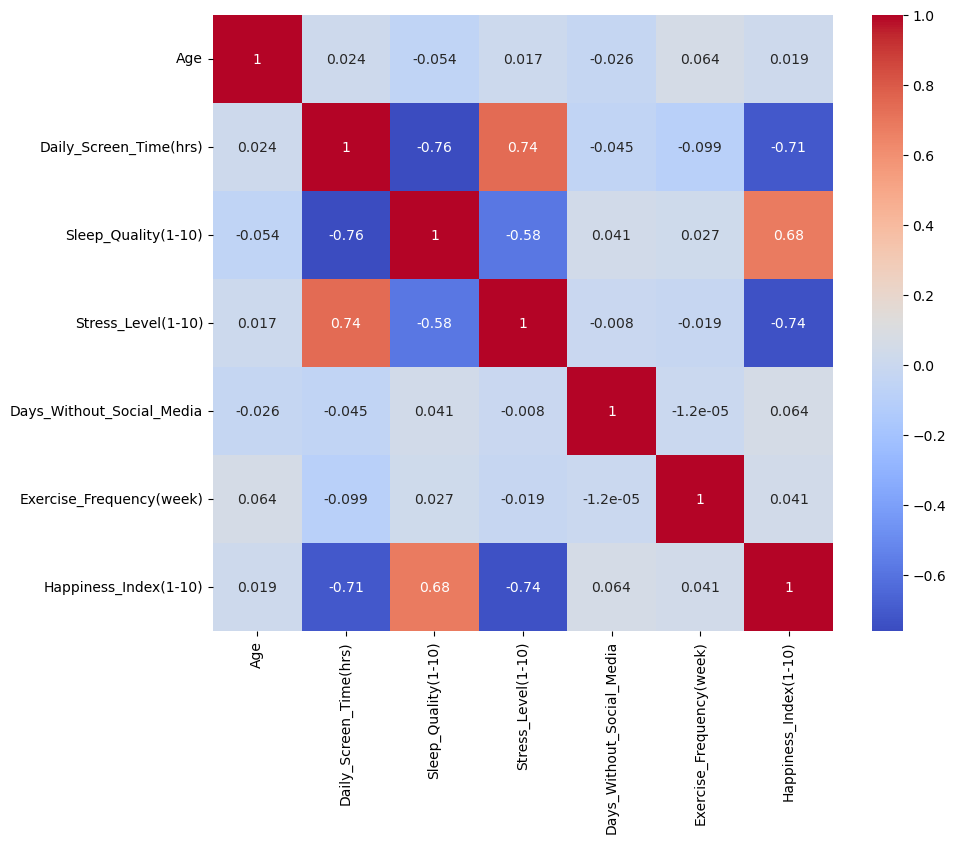

In [10]:
plt.figure(figsize=[10,8])
num_cols=df.select_dtypes(include=("int64" ,"float64"))

sns.heatmap(num_cols.corr(),
            annot=True,
            cmap="coolwarm")
plt.show()

## ❓ Q1. Which digital and lifestyle habits most strongly drive stress levels?

#### Finding the basic correlations
We begin by looking at basic correlations between stress level and key lifestyle/digital habits such as **screen time, sleep quality, exercise frequency, and social-media breaks**.

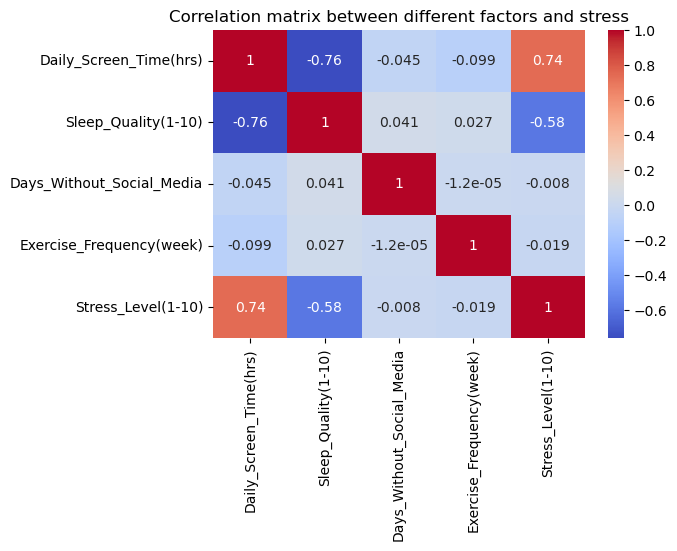

In [11]:
plt.figure(figsize=[6,4])
stress_df=df[['Daily_Screen_Time(hrs)','Sleep_Quality(1-10)','Days_Without_Social_Media',
              'Exercise_Frequency(week)','Stress_Level(1-10)']]

sns.heatmap(stress_df.corr(),
            annot=True,
            cmap="coolwarm")

plt.title("Correlation matrix between different factors and stress")
plt.show()

#### 🎯 Insights
* There is a strong positive correlation between Daily_Screen_Time(hrs) and stress.
* Strong negative correlation between Sleep_Quality(1-10) and stress.
* Days_Without_Social_Media, Exercise_Frequency(week) have weak relationship with stress

#### Visualizing Screen time vs Stress Level

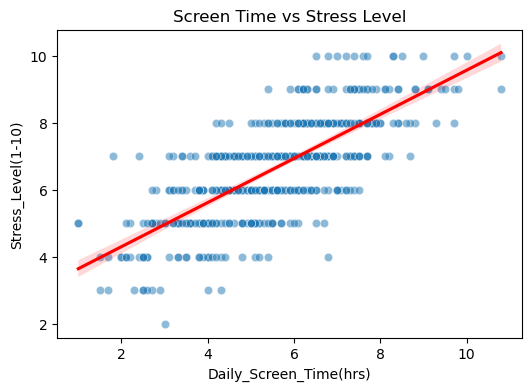

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, 
                x='Daily_Screen_Time(hrs)',
                y='Stress_Level(1-10)',
               alpha=0.5)
sns.regplot(
    data=df,
    x='Daily_Screen_Time(hrs)',
    y='Stress_Level(1-10)',
    scatter=False,
    color='red'
)

plt.title("Screen Time vs Stress Level")
plt.show()

#### 🎯 Insights
* Stress levels clearly increase as screen time increases
* Users spending 5+ hours/day on screens cluster in the high-stress range (7–10).
* Users with low screen time (<2 hours) rarely exhibit high stress scores.

#### Visualizing Sleep quality vs Stress Level

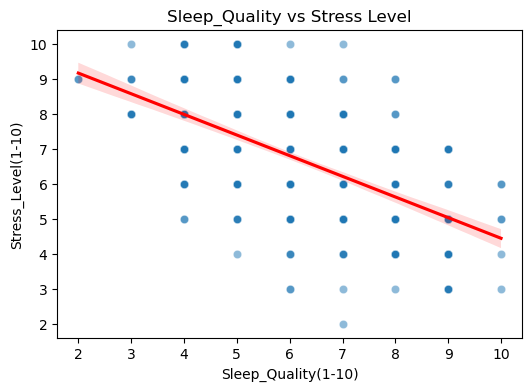

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, 
                x='Sleep_Quality(1-10)',
                y='Stress_Level(1-10)',
               alpha=0.5)
sns.regplot(
    data=df,
    x='Sleep_Quality(1-10)',
    y='Stress_Level(1-10)',
    scatter=False,
    color='red'
)

plt.title("Sleep_Quality vs Stress Level")
plt.show()


#### 🎯 Insights
* As sleep quality increases, stress decreases sharply — a clear negative relationship.
* Users reporting poor sleep quality (1–3) consistently show high stress (8–10).
* Users with good sleep quality (9–10) cluster in lower stress ranges (1–6).
* The regression line slopes downward strongly, confirming the trend.

#### Visualizing Exercise Frequency vs Stress Level

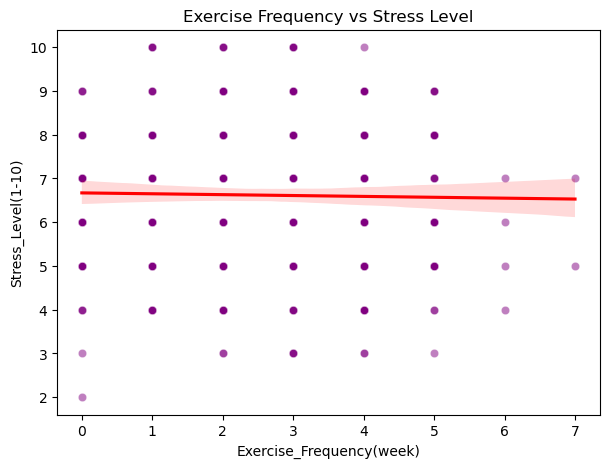

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Exercise_Frequency(week)',
    y='Stress_Level(1-10)',
    alpha=0.5,
    color='purple'
)

sns.regplot(
    data=df,
    x='Exercise_Frequency(week)',
    y='Stress_Level(1-10)',
    scatter=False,
    color='red'
)

plt.title("Exercise Frequency vs Stress Level")
plt.show()

#### 🎯 Insights
* Users who exercise 0–1 times per week show higher stress levels (6–10).
* As exercise frequency increases, stress levels trend lower.
* Users who exercise 5+ times per week show lesser high stress level.
* The downward regression line indicates a moderate negative relationship , not as strong as screen time or sleep, but still important.

#### Visualizing Days Without Social Media vs Stress Level

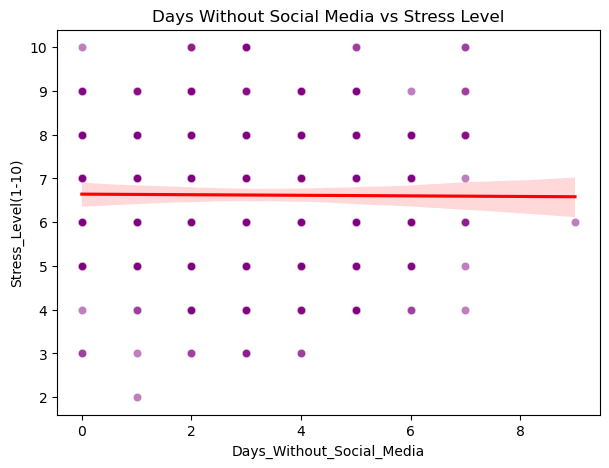

In [20]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x='Days_Without_Social_Media',
    y='Stress_Level(1-10)',
    alpha=0.5,
    color='purple'
)

sns.regplot(
    data=df,
    x='Days_Without_Social_Media',
    y='Stress_Level(1-10)',
    scatter=False,
    color='red'
)

plt.title("Days Without Social Media vs Stress Level")
plt.show()

#### 🎯 Insights
* Users who take 0–1 day breaks show higher stress levels
* As the number of days without social media increases, stress levels gradually decrease.
* The slope is slightly negative, like Social media breaks DO reduce stress . But the effect is weaker compared to sleep or screen time
* The relationship is more scattered because behavior varies among individuals.

### Observations :

**Screen time and sleep quality are the two strongest predictors of stress in users.
High screen-time significantly increases stress, while good sleep dramatically reduces it.
Exercise and social-media breaks also help, but to a lesser extent.** 

### Q2. Which factors have the biggest positive or negative effect on happiness?

### Q3. Which user groups are at highest risk and where can wellness apps intervene effectively?

### Q4. Does reducing screen time or taking breaks from social media improve mental well-being ?

### Q5.Which habits should a mental-health app focus on to improve user well-being?

## Conclusion

Let's revist the questions and include the observations  and recommendations from the analysis

### 1. Which digital and lifestyle habits most strongly drive stress levels?

Daily screen time is the strongest contributor to high stress, while sleep quality is the strongest protective factor. Exercise frequency and taking breaks from social media also help reduce stress, but their impact is smaller.


### 3. Which user groups are at highest risk  and where can wellness apps intervene effectively?¶